In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
pd.set_option('display.max_columns', 3000, 'display.max_rows', 3000)

In [ ]:
data = pd.read_csv("/content/rainfall.csv")

Checking the null values before processing the data

In [ ]:
# print(data.isnull().sum())
# print(data.shape)
# data

Total number of records grouped by the sub division name

In [ ]:
# data.groupby('SUBDIVISION').size()

Finding covariance and correlation of the given data set

In [ ]:
# data.cov()
# data.corr()

Making model

In [ ]:
#Not working
dict_sub = {'ANDAMAN & NICOBAR ISLANDS' : 1, 'ARUNACHAL PRADESH' : 2, 'ASSAM & MEGHALAYA' : 3, 'NAGA MANI MIZO TRIPURA' : 4,
       'SUB HIMALAYAN WEST BENGAL & SIKKIM' : 5, 'GANGETIC WEST BENGAL' : 6,
       'ORISSA' : 7, 'JHARKHAND' : 8, 'BIHAR' : 9, 'EAST UTTAR PRADESH' : 10,
       'WEST UTTAR PRADESH' : 11, 'UTTARAKHAND' : 12, 'HARYANA DELHI & CHANDIGARH' : 13,
       'PUNJAB' : 14, 'HIMACHAL PRADESH' : 15, 'JAMMU & KASHMIR' : 16, 'WEST RAJASTHAN' : 17,
       'EAST RAJASTHAN' : 18, 'WEST MADHYA PRADESH' : 19, 'EAST MADHYA PRADESH' : 20,
       'GUJARAT REGION' : 21, 'SAURASHTRA & KUTCH' : 22, 'KONKAN & GOA' : 23,
       'MADHYA MAHARASHTRA' : 24, 'MATATHWADA' : 25, 'VIDARBHA' : 26, 'CHHATTISGARH' : 27,
       'COASTAL ANDHRA PRADESH' : 28, 'TELANGANA' : 29, 'RAYALSEEMA' : 30, 'TAMIL NADU' : 31,
       'COASTAL KARNATAKA' : 32, 'NORTH INTERIOR KARNATAKA' : 33,
       'SOUTH INTERIOR KARNATAKA' : 34, 'KERALA' : 35, 'LAKSHADWEEP' : 36}

data['SUBDIVISION'].replace(dict_sub, inplace = True)
# data['SUBDIVISION']
# data['SUBDIVISION'].unique()

In [ ]:
# data.groupby('SUBDIVISION').get_group(31)

In [ ]:
# temp_data = data.groupby('SUBDIVISION').get_group(31)
# temp_data['Mar-May'].fillna(temp_data['Mar-May'].mean())
# x_data = temp_data[['YEAR', 'Mar-May']]
# y_data = temp_data['MAY'].fillna(data['MAY'].mean())

# regr = linear_model.LinearRegression()
# regr.fit(x_data.values, y_data.values)
# predictJanRain = regr.predict([[1902, 131.7]])
# predictJanRain

In [ ]:
# data.cov()
# data.corr()
# data.info()
# data.describe()
# data['SUBDIVISION'].unique()
dict_sub.keys()

dict_keys(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA', 'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL', 'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH', 'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH', 'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH', 'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA', 'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH', 'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU', 'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA', 'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'])

## DATA VISUALIZATION
Representing the data using visualization tools & libraries

---



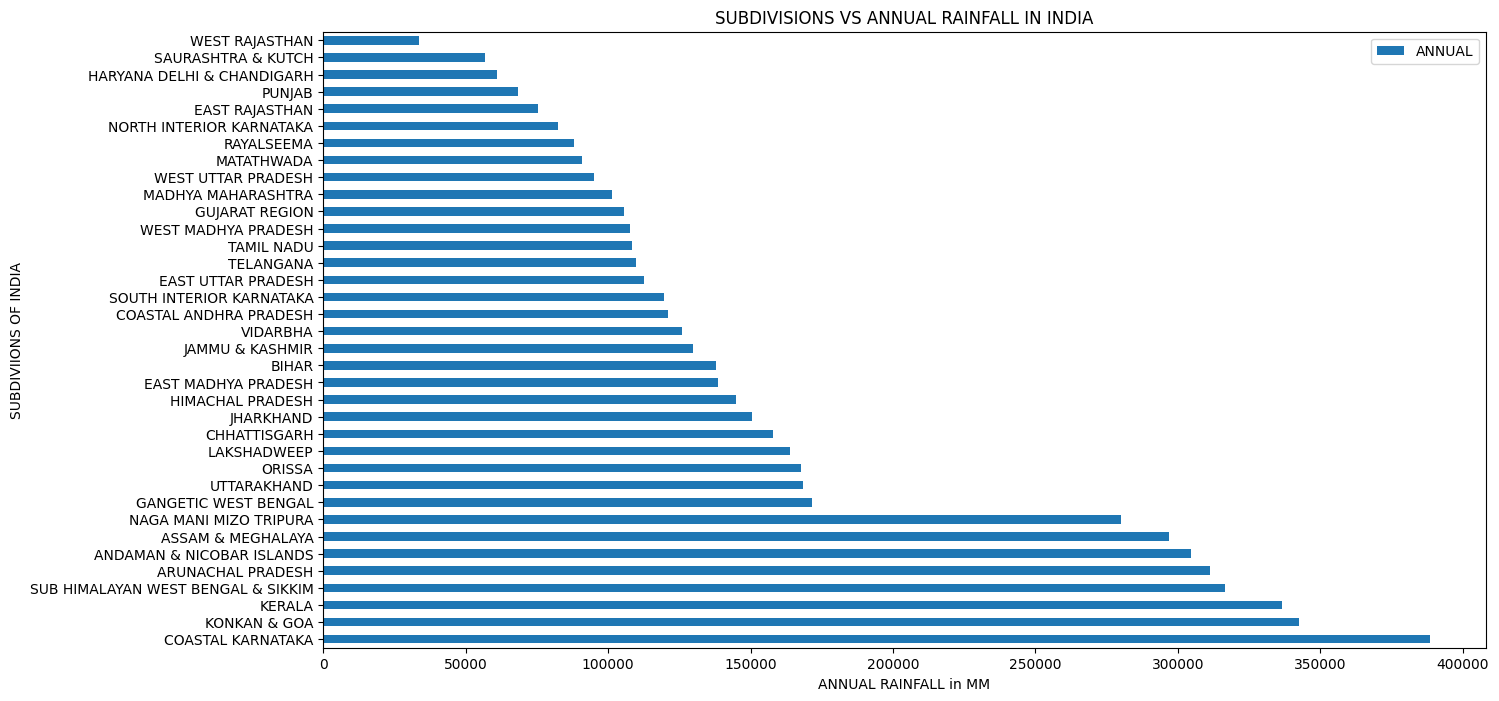

In [ ]:
a = {value:key for key, value in dict_sub.items()}
# data['SUBDIVISION'].unique()
data['SUBDIVISION'].replace(a, inplace=True)
temp_data = data[['SUBDIVISION', 'ANNUAL']].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL', ascending=False)
temp_data.plot(kind='barh', stacked=True, figsize=(15, 8))
plt.xlabel("ANNUAL RAINFALL in MM")
plt.ylabel("SUBDIVIIONS OF INDIA")
plt.title("SUBDIVISIONS VS ANNUAL RAINFALL IN INDIA")
data['SUBDIVISION'].replace(dict_sub, inplace=True)

<Axes: xlabel='YEAR'>

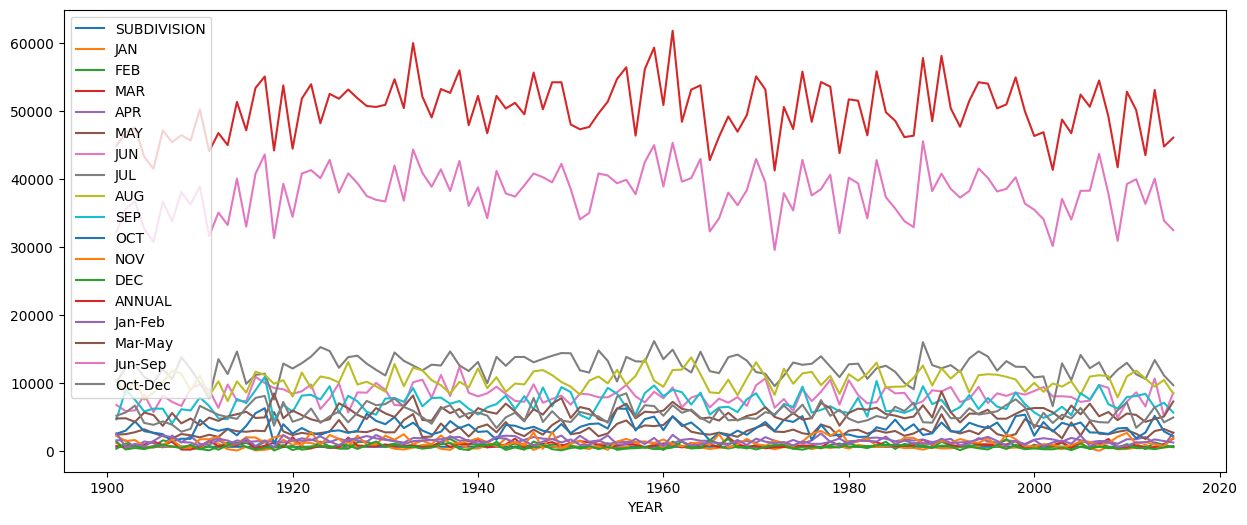

In [ ]:
data.groupby("YEAR").sum().plot()

In [ ]:
state = input("Enter the state name : ")
group = data.groupby("SUBDIVISION")['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
grouped_data = group.get_group(dict[state])
# grouped_data.head()
dataFrame = grouped_data.melt(['YEAR']).reset_index()
## dataFrame.head()
dataFrame = dataFrame[['YEAR', 'variable', 'value']].reset_index().sort_values(by=['YEAR', 'index'])
## dataFrame.YEAR.unique()
## dataFrame.columns['Index', 'Year', 'Month', 'Avg_Rainfall']
# dataFrame = dataFrame[1:][:]
dataFrame.rename(columns={'index':'Index', 'YEAR':'Year', 'variable':'Month', 'value':'Avg_Rainfall'}, inplace=True)
## dataFrame.head()
month_dict = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12, 'NA':13}
dataFrame['Month'] = dataFrame['Month'].map(month_dict)
# dataFrame['Month'] = dataFrame['Month'].fillna(0)
# dataFrame['Avg_Rainfall'] = dataFrame['Avg_Rainfall'].replace(state, 0)
## for i in dataFrame['Avg_Rainfall']:
##   print(i)
# dataFrame.drop(columns="Index", inplace=True)
# dataFrame.head()

Enter the state name : TAMIL NADU


<ipython-input-249-84926579aedd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = data.groupby("SUBDIVISION")['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']


## Model Training

In [ ]:
state = input("Enter the state name : ")
group = data.groupby("SUBDIVISION")['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
grouped_data = group.get_group(dict[state])

dataFrame = grouped_data.melt(['YEAR']).reset_index()
dataFrame = dataFrame[['YEAR', 'variable', 'value']].reset_index().sort_values(by=['YEAR', 'index'])
dataFrame.rename(columns={'index':'Index', 'YEAR':'Year', 'variable':'Month', 'value':'Avg_Rainfall'}, inplace=True)

month_dict = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12, 'NA':13}
dataFrame['Month'] = dataFrame['Month'].map(month_dict)

Enter the state name : TAMIL NADU


NameError: ignored

In [ ]:
X = np.asanyarray(dataFrame[['Year', 'Month']]).astype('int')
y = np.asanyarray(dataFrame['Avg_Rainfall']).astype('int')
# print(X.shape)
# print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#predicting
Y_Train_Predict = mlr.predict(x_train)
Y_Test_Predict = mlr.predict(x_test)

In [ ]:
print("-------------------------Test data-------------------------")
print("MAE: ", metrics.mean_absolute_error(y_test, Y_Test_Predict))
print("MSE: ", metrics.mean_squared_error(y_test, Y_Test_Predict))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, Y_Test_Predict)))

print("-------------------------Training data-------------------------")
print("MAE: ", metrics.mean_absolute_error(y_train, Y_Train_Predict))
print("MSE: ", metrics.mean_squared_error(y_train, Y_Train_Predict))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, Y_Train_Predict)))

print("-------------------------Training data Accuracy-------------------------")
print(round(mlr.score(x_train, y_train), 3) * 100)
print("-------------------------Testing data Accuracy-------------------------")
print(round(mlr.score(x_test, y_test), 3) * 100)

-------------------------Test data-------------------------
MAE:  36.693305772295616
MSE:  2707.377549592384
RMSE:  52.032466303187896
-------------------------Training data-------------------------
MAE:  37.6843320300359
MSE:  3113.2867829842517
RMSE:  55.79683488321046
-------------------------Training data Accuracy-------------------------
41.699999999999996
-------------------------Testing data Accuracy-------------------------
33.1


In [ ]:
print(mlr.predict([[2023, 5]]))

[57.09951057]
